In [43]:
import cv2

# Load the site plan image
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/siteplan1.jpg")

# Example: Coordinates where annotations will appear (you need to adjust these based on your actual image)
x, y = 100, 150  # Adjust these coordinates as per your requirements

# Annotate the image based on the matched regulation
cv2.putText(img, "Drainage Area - Conserve", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Optionally, you can draw shapes like bounding boxes (if you want to highlight areas):
cv2.rectangle(img, (50, 100), (200, 250), (255, 0, 0), 2)  # Example coordinates for the bounding box

# Save the annotated image
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/annotated_site_plan.jpg", img)


True

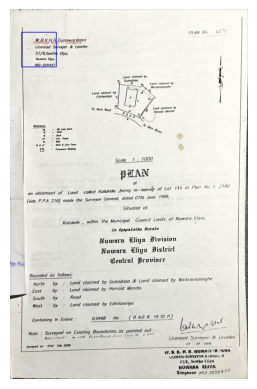

In [44]:
import matplotlib.pyplot as plt
import cv2

# Read the saved annotated image
annotated_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/annotated_site_plan.jpg")

# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(annotated_img_rgb)
plt.axis('off')  # Hide axis
plt.show()

No matches found!


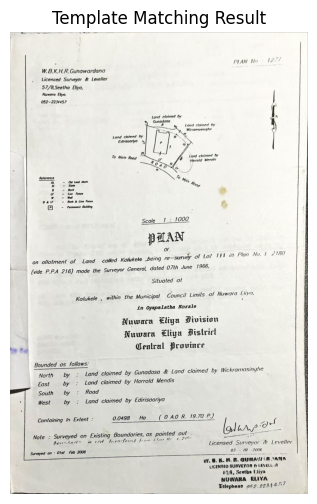

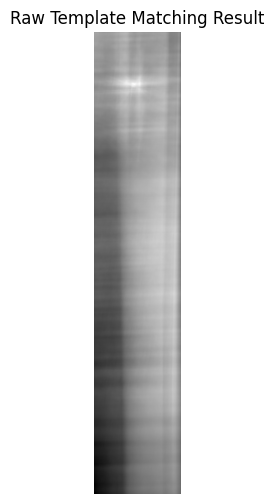

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the full document image and the template
image_path = "/content/drive/MyDrive/Colab Notebooks/siteplan1.jpg"
template_path = "/content/drive/MyDrive/Colab Notebooks/siteImage.png"
image = cv2.imread(image_path)
template = cv2.imread(template_path)

# Convert both images to grayscale and apply histogram equalization
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
gray_image = cv2.equalizeHist(gray_image)
gray_template = cv2.equalizeHist(gray_template)

# Apply template matching
result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)

# Set a lower threshold for better matching
threshold = 0.7  # Lower the threshold
locations = np.where(result >= threshold)

# Check if any matches were found
if locations[0].size == 0:
    print("No matches found!")
else:
    print(f"Found {len(locations[0])} match(es).")
    # Draw rectangles around matches
    for pt in zip(*locations[::-1]):
        cv2.rectangle(image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

# Convert the image to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the matched result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Template Matching Result")
plt.show()

# Optionally visualize the raw match result
plt.figure(figsize=(10, 6))
plt.imshow(result, cmap='gray')
plt.title("Raw Template Matching Result")
plt.axis('off')
plt.show()


In [46]:
!pip install pytesseract

In [47]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


Extracted Text from Site Plan:
Mle he Sieeratte Shy Suet Pie) MS RE aig Mae et i a
ARO R Gunawardand BS fe eae Fle = aye :
Si benced: Survéyor esteveller fr 2 Vie Pag FT OE ~ Ee
tS ess Ctr eee dit es Oe MET ree ot ;
eVS7/aSesthe Bye, 33, 105 Gra es RENE ies ey 7
aN amare Bee EOE tags ae be ee En toe
BER, Syitesr hay, SECS PA Tees ye don eee ey Ae
1 ee corinne Aa ee WERT ' we i:
Seay ag hr Sage MPR SE! Fe => ts woe of
See abt Me ee So ye TE oo ees med : : te
eas SR gy ee Ee oe ge DELS Ba agate ee . Be Be n é,
JE PSS OES DSbsth Tn eT se hand, claimed by 5 2 Sore boos
Repay alee BREE oy tte Mg) i madase, Tye oy ees 8 .
Pin atient Se cea yk cle 8 sir RN gf Thand chimed bre" ee Bo dN
SPORE ose Gs FS TESS SIS Wemmatanass SE
eS ele! SB le tang ‘ebony | 8 SOP ENR NR eos -
Mead mna gues tbe gh te eT emmseop yt Pon ofS Oe MO th
Fig pn Seb PS EP Uy ee ge TPE LS Nak Ben ee ol
PES BSR Ge eB Se Bad sh ad Lay a rr eS - .
See etn ee yn es Moin Rone ETE SSL, Did etoimed bys: one
Bag pe GP ogee Pr Ns ae

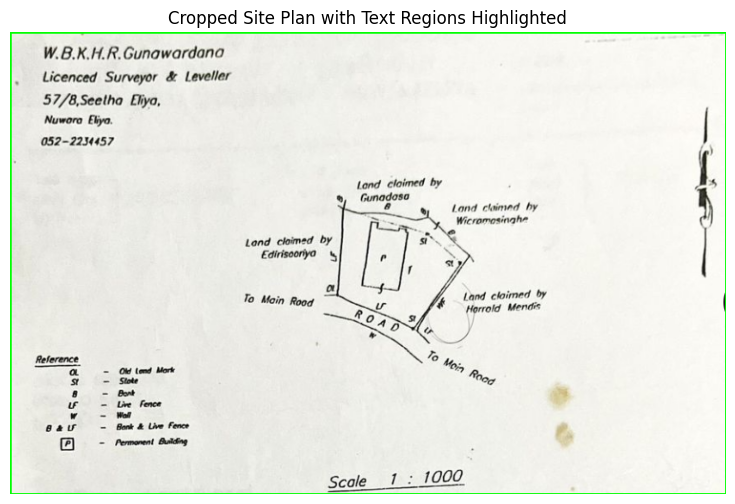

In [49]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

# Load the cropped site plan image
image_path = "/content/drive/MyDrive/Colab Notebooks/siteImage.png"  # Update with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding (better for varying lighting conditions)
threshold_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Denoise the image (optional)
denoised_image = cv2.fastNlMeansDenoising(threshold_image, None, 30, 7, 21)

# Use Tesseract to extract text from the image
custom_oem_psm_config = r'--oem 3 --psm 6'  # This config can work well for documents with text
extracted_text = pytesseract.image_to_string(denoised_image, config=custom_oem_psm_config)

# Print the extracted text (can be further processed if needed)
print("Extracted Text from Site Plan:")
print(extracted_text)

# Optionally, you can highlight specific words like "Scale", "Road", etc.
# We can perform text searching to find the keyword locations in the image

# Set up a list of keywords you want to search for
keywords = ['Scale', 'Boundary', 'Road', 'Land Claimed', 'Regulation']

# Search for keywords in the extracted text
highlighted_text = []
for keyword in keywords:
    if keyword.lower() in extracted_text.lower():
        highlighted_text.append(f"Found: {keyword}")

# Display found keywords in the terminal
if highlighted_text:
    print("\nHighlighted Keywords Found:")
    for text in highlighted_text:
        print(text)
else:
    print("\nNo specific keywords found in the extracted text.")

# To visualize areas with text: Draw bounding boxes around detected text regions
h, w = gray_image.shape
boxes = pytesseract.image_to_boxes(denoised_image)

for box in boxes.splitlines():
    b = box.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)  # Draw bounding box

# Convert the image to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image with bounding boxes around the text
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Cropped Site Plan with Text Regions Highlighted")
plt.show()


Extracted Text from Rotated Site Plan ROI:
oS URNS Toles carat rosy
BANOS? coon, wane ee a
ee cages Ba
tee BMG oA LG ees
ars Te gate ¥ Aap
PE tae Ee 7 ee

HP aes Wis vide kend eomned PF!
vate BeSuosge dN fend er gaseerya
RE I! Weyge el tela



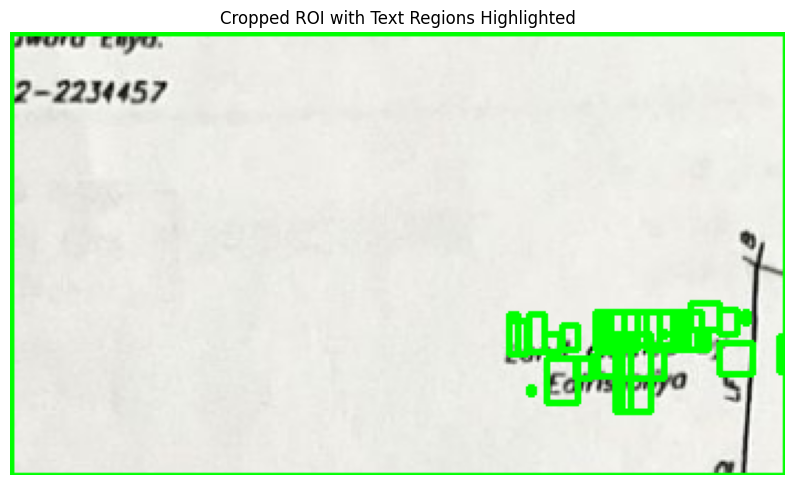

In [50]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Load the cropped site plan image
image_path = "/content/drive/MyDrive/Colab Notebooks/siteImage.png"  # Update with your image path
image = cv2.imread(image_path)

# Manually define a region where the scale is located (adjust this as needed)
roi = image[100:300, 50:400]  # Define the region of interest

# Convert the ROI (Region of Interest) to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Rotate the image by a fixed angle (e.g., 5 degrees)
height, width = gray_roi.shape
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 5, 1)  # Rotate by 5 degrees
rotated_image = cv2.warpAffine(gray_roi, rotation_matrix, (width, height))

# Apply adaptive thresholding
threshold_image = cv2.adaptiveThreshold(rotated_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Denoise the image (optional)
denoised_image = cv2.fastNlMeansDenoising(threshold_image, None, 30, 7, 21)

# Use Tesseract to extract text from the rotated and preprocessed image
custom_oem_psm_config = r'--oem 3 --psm 6'  # Experiment with different psm modes
extracted_text = pytesseract.image_to_string(denoised_image, config=custom_oem_psm_config)

# Print the extracted text (can be further processed if needed)
print("Extracted Text from Rotated Site Plan ROI:")
print(extracted_text)

# Highlight text regions in the rotated image using bounding boxes
h, w = gray_roi.shape
boxes = pytesseract.image_to_boxes(denoised_image)

# Draw bounding boxes around the detected text areas
for box in boxes.splitlines():
    b = box.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(roi, (x, h - y), (x2, h - y2), (0, 255, 0), 2)  # Draw bounding box

# Convert the rotated image to RGB for displaying in Matplotlib
rotated_image_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

# Show the image with bounding boxes around the text
plt.figure(figsize=(10, 6))
plt.imshow(rotated_image_rgb)
plt.axis("off")
plt.title("Cropped ROI with Text Regions Highlighted")
plt.show()


In [51]:
custom_oem_psm_config = r'--oem 1 --psm 3'  # Fully automatic page segmentation
extracted_text = pytesseract.image_to_string(threshold_image, config=custom_oem_psm_config)


In [52]:
# Resize image for better OCR accuracy
image_resized = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  # 2x scaling
gray_image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

# Apply thresholding and then OCR
threshold_image_resized = cv2.adaptiveThreshold(gray_image_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
extracted_text = pytesseract.image_to_string(threshold_image_resized, config=custom_oem_psm_config)


In [ ]:
from google.colab.patches import cv2_imshow

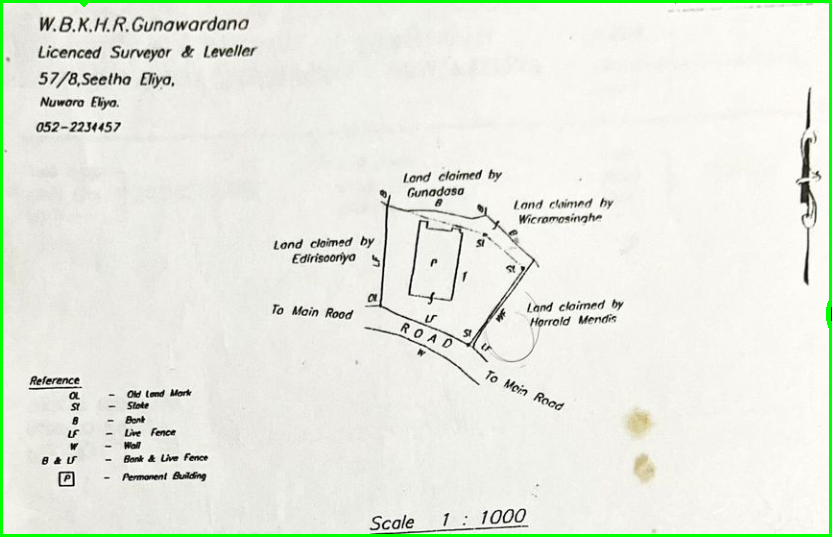

In [53]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/siteImage.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to highlight the lines and curves
_, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image to visualize them
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Display the contours
cv2_imshow(image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()
